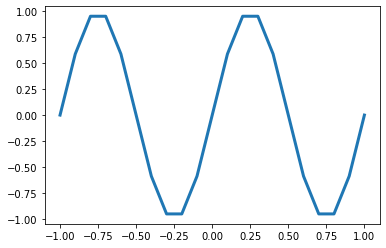

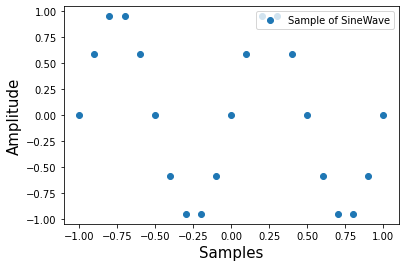

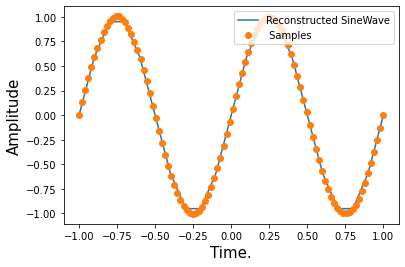

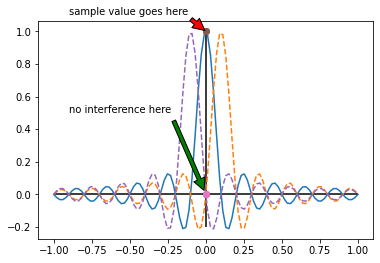

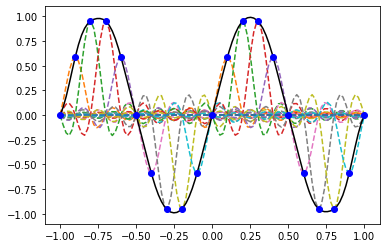

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib.figure as fig
from scipy import signal
f = 1.0  # Hz, signal frequency
fs = 0.5 # Hz, sampling rate (ie. >= 2*f) 
#t = np.linspace(0, 0.5, 2000)
ts = np.arange(-1,1+1/fs,1/fs) # sample points
t = np.arange(-1,1+1/fs,1/fs) # sample interval, symmetric for convenience later
x = np.sin(2*np.pi*f*t)
#plt.subplot(1, 2, 1)
plt.plot(ts, x, linewidth=3, label='SineWave')
plt.show()
plt.plot(t, x, 'o', linewidth=3, label='Sample of SineWave')
plt.xlabel('Samples', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.show()




t = np.linspace(-1,1,100) # redefine this here for convenience
num_coeffs=len(ts) 
sm=0
for k in range(-num_coeffs,num_coeffs): # since function is real, need both sides
   sm+=np.sin(2*np.pi*(k/fs))*np.sinc( k - fs * t)
#plt.subplot(1, 2, 2)
plt.plot( ts, np.sin(2*np.pi*ts), label='Reconstructed SineWave')
plt.plot(t,sm,'o', label=' Samples')
plt.xlabel('Time.', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')




plt.show()
k=0
plt.plot (t,np.sinc( k - fs * t), 
         t,np.sinc( k+1 - fs * t),'--',k/fs,1,'o',(k)/fs,0,'o',
         t,np.sinc( k-1 - fs * t),'--',k/fs,1,'o',(-k)/fs,0,'o'
)
plt.hlines(0,-1,1)
plt.vlines(0,-.2,1)
plt.annotate('sample value goes here',
            xy=(0,1),
            xytext=(-1+.1,1.1),
            arrowprops={'facecolor':'red','shrink':0.05},
            )
plt.annotate('no interference here',
            xy=(0,0),
            xytext=(-1+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},
            )




plt.show()
k=np.array(sorted(set((t*fs).astype(int)))) # sorted coefficient list

plt.plot(t,(np.sin(2*np.pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).T,'--', # individual whittaker functions
        t,(np.sin(2*np.pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).sum(axis=0),'k-', # whittaker interpolant
     k/fs,np.sin(2*np.pi*k/fs),'ob')# samples
#plt.set_xlabel('time',fontsize=14)
plt.axis((-1.1,1.1,-1.1,1.1));
